In [1]:
import warnings 
import itertools 
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import datetime as dt
plt.style.use('fivethirtyeight') 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import math
warnings.filterwarnings('ignore')

In [2]:
# Trích xuất dữ liệu 
SSI=pd.read_csv('SSII.csv')
SSI['Date'] = pd.to_datetime(SSI['Date'])
SSI = SSI.set_index('Date')
SSI.head()

,Close
Date,
2006-12-18,11508
2006-12-19,12460
2006-12-20,12366
2006-12-21,11842
2006-12-22,10662


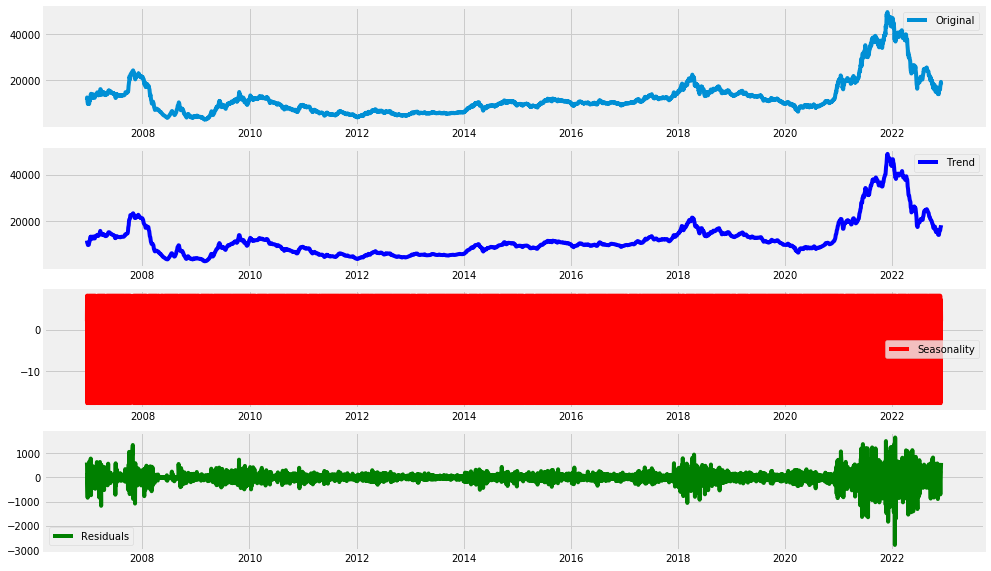

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(x=SSI, model='additive',freq=5)
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(SSI, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

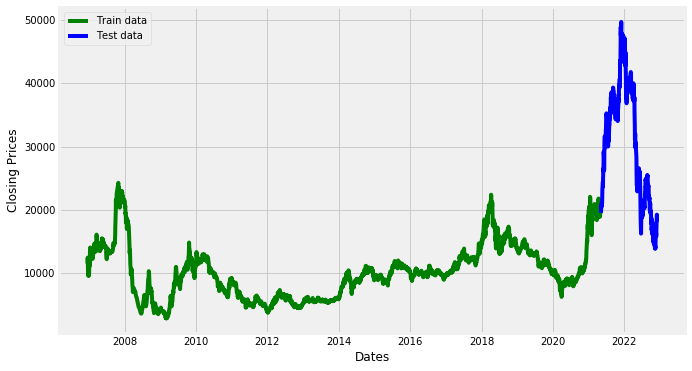

In [3]:
#split data into train and training set
train_data, test_data = SSI[0:int(len(SSI)*0.9)], SSI[int(len(SSI)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [4]:
# Xác định các tham số p, d và q nhận bất kỳ giá trị nào trong khoảng từ 0 đến 2
p = d = q = range(0, 2)  
# Tạo tất cả các kết hợp khác nhau của bộ ba p, q và q
pdq = list(itertools.product(p, d, q))  
# Tạo tất cả các kết hợp khác nhau của bộ ba p, q và q theo mùa
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  
print('Examples of parameter combinations for Seasonal ARIMA...') 
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1])) 
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2])) 
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3])) 
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4])) 

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
warnings.filterwarnings("ignore") 
for param in pdq:     
    for param_seasonal in seasonal_pdq:     
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)              
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:             
            continue 



ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:76469.29758485322
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:73678.36151466393
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:60092.02581362963
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:59789.49875254142
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:60109.67662034785
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:60035.88792702127
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:59800.02686670644
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:59755.74228264894
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:73809.7582899406
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:72914.5543176579
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:56422.68660456198
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:56177.19262754811
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:56464.08074279454
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:56414.93043244113
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:56207.73038205484
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:56173.21032518496
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:50079.478576314694
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:49860.75477638418
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:52320.908998

In [11]:
mod = sm.tsa.statespace.SARIMAX(train_data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)  
results = mod.fit()  
print(results.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3569
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -24841.885
Date:                            Sun, 05 Mar 2023   AIC                          49689.770
Time:                                    22:48:00   BIC                          49708.287
Sample:                                         0   HQIC                         49696.374
                                           - 3569                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1009      0.009     11.357      0.000       0.083       0.118
ma.S.L12      -1.0000      0.013   

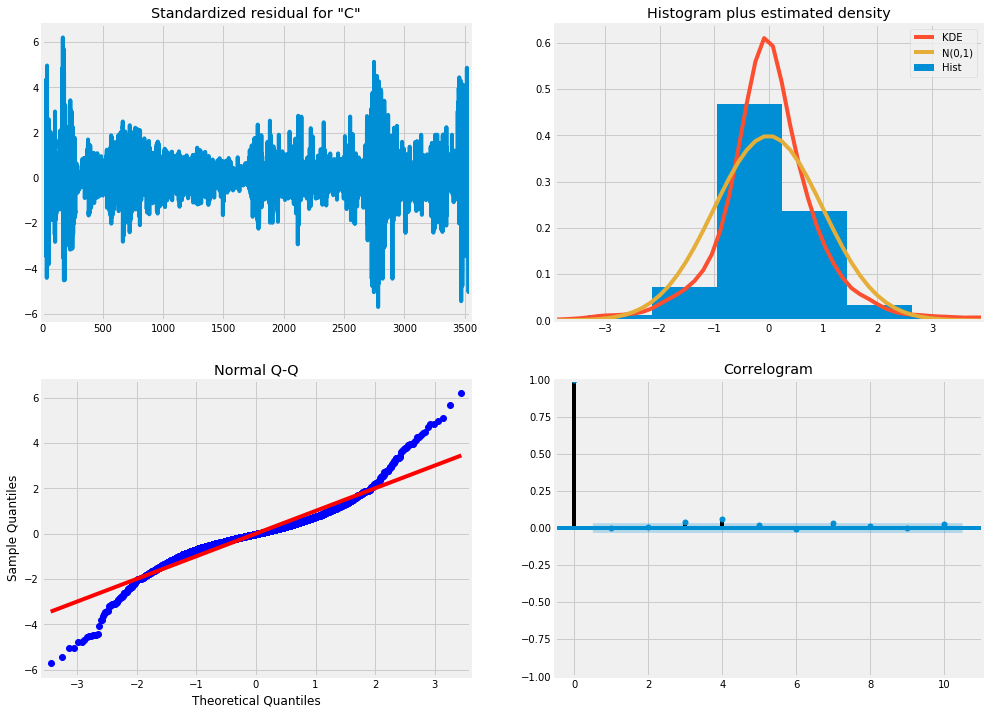

In [12]:
results.plot_diagnostics(figsize=(15, 12)) 
plt.show() 

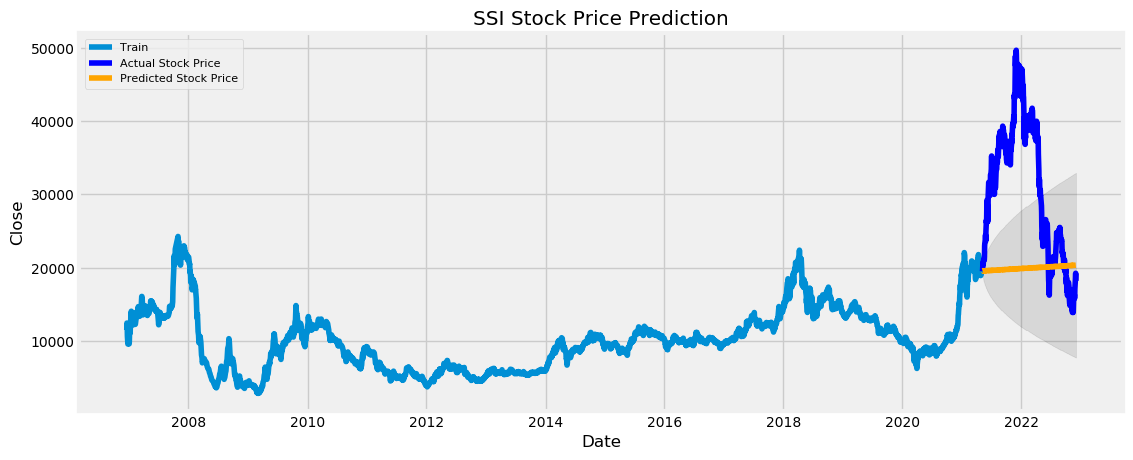

In [26]:
result = results.get_forecast(397, alpha =0.05).summary_frame()
fc_series = pd.Series(result['mean'].values, index=test_data.index)
lower_series = pd.Series(result['mean_ci_lower'].values, index=test_data.index)
upper_series = pd.Series(result['mean_ci_upper'].values, index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Train')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SSI Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(loc='upper left', fontsize=8)# Chú thích
plt.show()

In [27]:
fc = result['mean'].values
print('MSE:')
print(mean_squared_error(test_data, fc))
print('RMSE:')
print(np.sqrt(mean_squared_error(test_data, fc)))
print('MAE:')
print(mean_absolute_error(test_data, fc)) 
print('MAPE:')
print(mean_absolute_percentage_error(test_data, fc))

MSE:
207256190.4453944
RMSE:
14396.395050337927
MAE:
11735.294325532537
MAPE:
0.3345890999410367
